## Feature Scaling

In [49]:
## feature scaling is a technique to standardize the independent features present in the data in a fixed range 

## Why Do We Need Feature Scaling?

Feature scaling is a crucial preprocessing step in Machine Learning because most algorithms are sensitive to the scale of input features.

### 1. Equal Contribution of Features
- Features may have different units and ranges (e.g., age vs salary).
- Without scaling, features with larger values dominate the model.
- Scaling ensures **fair contribution from all features**.

### 2. Faster Model Convergence
- Gradient-based algorithms converge faster when features are on a similar scale.
- Reduces training time and improves optimization efficiency.

### 3. Better Distance Calculations
- Algorithms like KNN, K-Means, and SVM rely on distance metrics.
- Unscaled data leads to incorrect distance measurements.

### 4. Improved Model Performance
- Scaling often leads to better accuracy and stability.
- Prevents numerical instability in computations.

### 5. Required for Certain Algorithms
Feature scaling is essential for:
- Linear Regression
- Logistic Regression
- Support Vector Machines (SVM)
- K-Nearest Neighbors (KNN)
- K-Means Clustering
- Principal Component Analysis (PCA)

### 6. Not Needed for Tree-Based Models
- Decision Trees, Random Forests, and Gradient Boosting are **scale-invariant**.
- They split data based on thresholds, not distances.

### Key Takeaway
> Feature scaling ensures fairness, stability, and efficiency in Machine Learning models and is a must-have step for most algorithms.


Types of feature scaling

1) Standardization 
2) Normalization      [min-max scaler , robust scaler etc.]

### Standardization

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df= pd.read_csv("Social_Network_Ads.csv")

In [52]:
df = df.iloc[:,2:]

In [53]:
df.sample(5)

,Age,EstimatedSalary,Purchased
53,35,23000,0
272,60,42000,1
234,38,112000,0
68,22,63000,0
200,35,39000,0


## Train test split

In [73]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(df.drop('Purchased',axis=1),
                                                      df['Purchased'],
                                                      test_size=0.3,
                                                      random_state=42)

In [74]:
X_train.shape , X_test.shape , y_test.shape

((280, 2), (120, 2), (120,))

## Standardization 

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled=  scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [77]:
scaler.mean_

array([3.75750000e+01, 7.05892857e+04])

In [78]:
X_train_scaled = pd.DataFrame(X_train_scaled , columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled , columns=X_test.columns)

In [79]:
X_train_scaled

,Age,EstimatedSalary
0,-0.842522,0.130156
1,0.041758,0.277702
2,0.729530,-1.315791
3,1.613809,1.103957
4,0.827784,-1.404318
...,...,...
275,-1.333788,-1.286281
276,-1.137281,-1.050209
277,0.533024,1.841685
278,0.140011,0.189175


In [80]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.6,70589.3
std,10.2,33948.5
min,18.0,15000.0
25%,30.0,44000.0
50%,37.0,71000.0
75%,45.0,88000.0
max,60.0,150000.0


In [81]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,-0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.7,-0.8
50%,-0.1,0.0
75%,0.7,0.5
max,2.2,2.3


## Effect of Scaling 

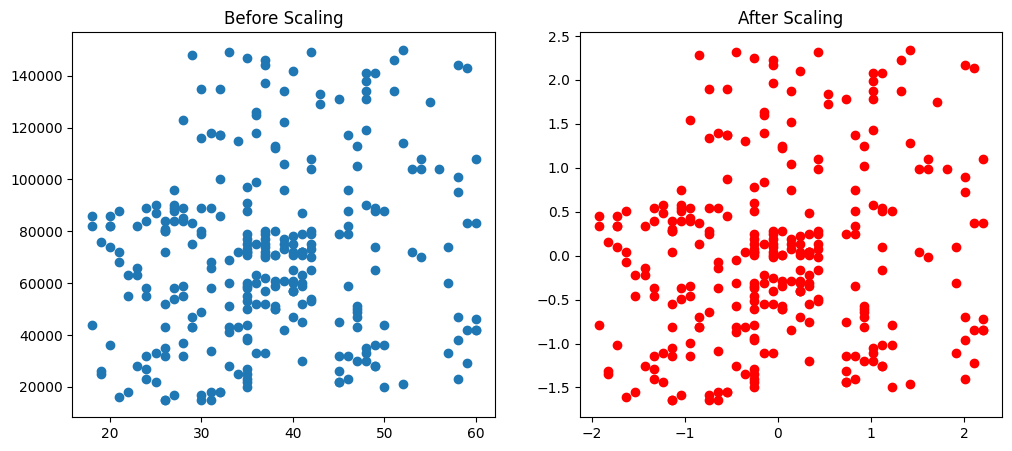

In [82]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train["Age"], X_train["EstimatedSalary"])
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled["Age"], X_train_scaled["EstimatedSalary"],color="red")
ax2.set_title("After Scaling")

plt.show()

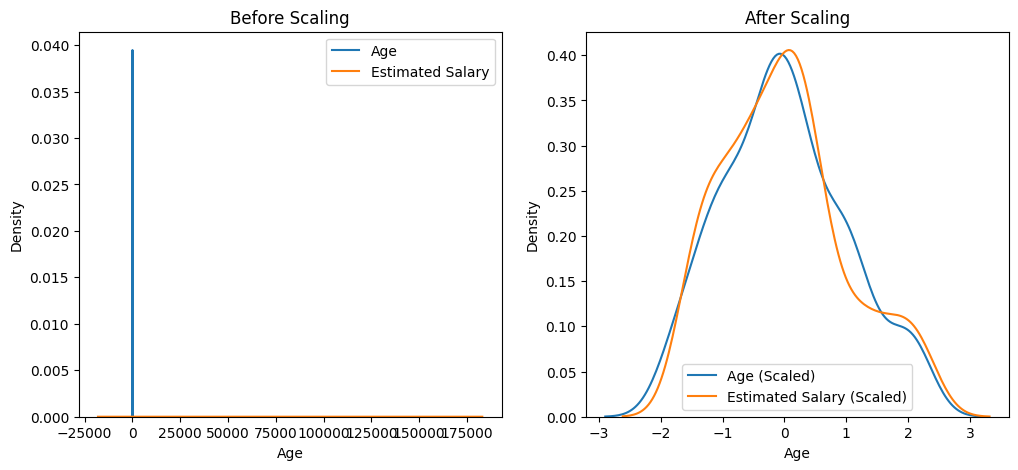

In [83]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Before scaling
ax1.set_title("Before Scaling")
sns.kdeplot(X_train["Age"], ax=ax1, label="Age")
sns.kdeplot(X_train["EstimatedSalary"], ax=ax1, label="Estimated Salary")
ax1.legend()

# After scaling
ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled["Age"], ax=ax2, label="Age (Scaled)")
sns.kdeplot(X_train_scaled["EstimatedSalary"], ax=ax2, label="Estimated Salary (Scaled)")
ax2.legend()

plt.show()


## Comparison of Distribution 

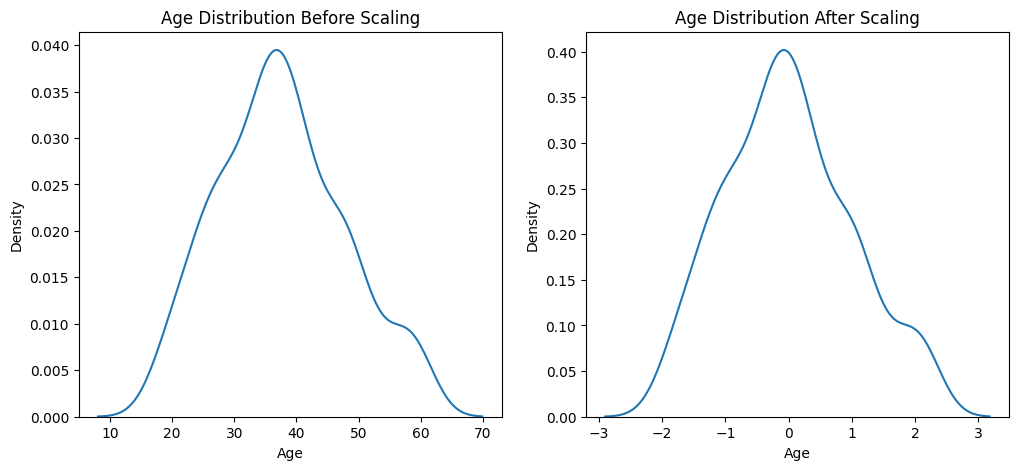

In [84]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title("Age Distribution Before Scaling")
sns.kdeplot(X_train['Age'] , ax=ax1)

# after scaling
ax2.set_title("Age Distribution After Scaling")
sns.kdeplot(X_train_scaled['Age'] , ax=ax2)
plt.show()

In [85]:
## same will be for EstimatedSalary

### Standardization does NOT change the shape of the data — it only changes the scale.

# Why scaling is Important?

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [88]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [89]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [90]:
from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy without scaling:", accuracy_score(y_test, y_pred))
print("Accuracy with scaling   :", accuracy_score(y_test, y_pred_scaled))

Accuracy without scaling: 0.85
Accuracy with scaling   : 0.85


In [91]:
print("Confusion Matrix (No Scaling):\n", confusion_matrix(y_test, y_pred))
print("Confusion Matrix (With Scaling):\n", confusion_matrix(y_test, y_pred_scaled))

Confusion Matrix (No Scaling):
 [[71  2]
 [16 31]]
Confusion Matrix (With Scaling):
 [[71  2]
 [16 31]]


In [92]:
print("No scaling coefficients:", lr.coef_)
print("Scaled coefficients    :", lr_scaled.coef_)

No scaling coefficients: [[1.97604783e-01 3.31255712e-05]]
Scaled coefficients    : [[1.86615744 1.0463409 ]]


In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree accuracy (no scaling):",
      accuracy_score(y_test, y_pred_dt))


Decision Tree accuracy (no scaling): 0.8583333333333333


In [94]:
dt_scaled = DecisionTreeClassifier(random_state=0)
dt_scaled.fit(X_train_scaled, y_train)

y_pred_dt_scaled = dt_scaled.predict(X_test_scaled)

print("Decision Tree accuracy (with scaling):",
      accuracy_score(y_test, y_pred_dt_scaled))


Decision Tree accuracy (with scaling): 0.8416666666666667


## KNN

In [95]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN accuracy without scaling:",
      accuracy_score(y_test, y_pred_knn))

KNN accuracy without scaling: 0.8166666666666667


In [96]:
knn_scaled = KNeighborsClassifier(n_neighbors=5)

knn_scaled.fit(X_train_scaled, y_train)
y_pred_knn_scaled = knn_scaled.predict(X_test_scaled)

print("KNN accuracy with scaling:",
      accuracy_score(y_test, y_pred_knn_scaled))

KNN accuracy with scaling: 0.9333333333333333


In [97]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


## Effect of Outlier 

In [110]:
df = pd.concat(
    [
        df,
        pd.DataFrame({
            "Age": [5, 90, 95],
            "EstimatedSalary": [1000, 250000, 350000],
            "Purchased": [0, 1, 1]
        })
    ],
    ignore_index=True
)

In [111]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
401,90,250000,1
402,95,350000,1
403,5,1000,0
404,90,250000,1


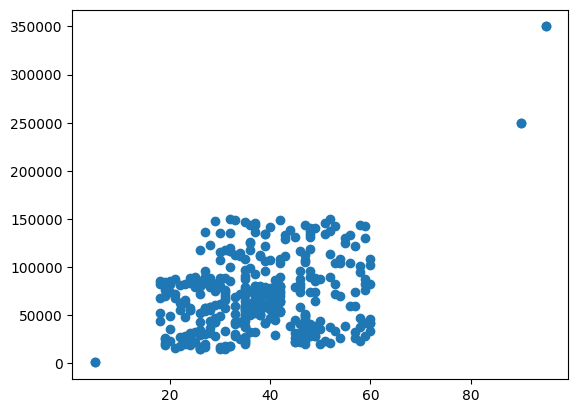

In [114]:
plt.scatter(df["Age"] , df["EstimatedSalary"])

In [102]:
X_train.shape , X_test.shape

((282, 2), (121, 2))

In [112]:
## train test split 
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(df.drop('Purchased',axis=1),
                                                      df['Purchased'],
                                                      test_size=0.3,
                                                      random_state=42)

In [113]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled=  scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [115]:
X_train_scaled = pd.DataFrame(X_train_scaled , columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled , columns=X_test.columns)

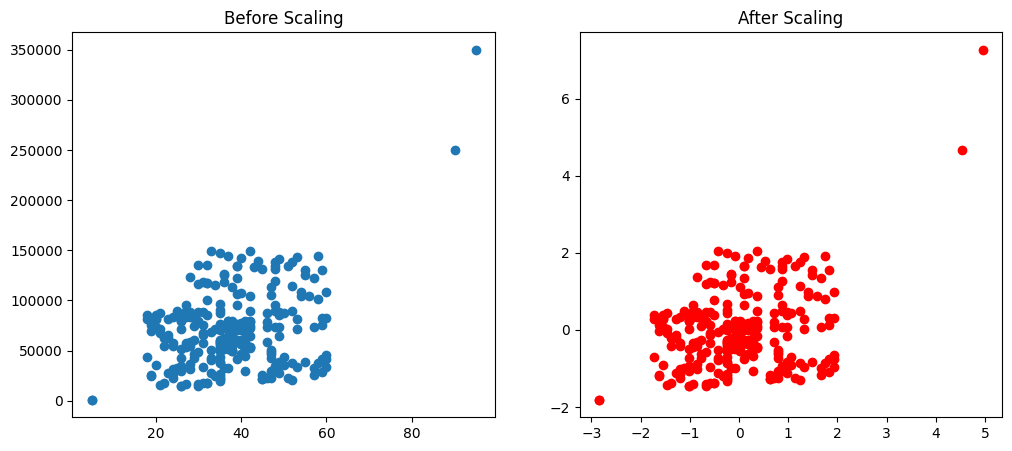

In [116]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train["Age"], X_train["EstimatedSalary"])
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled["Age"], X_train_scaled["EstimatedSalary"],color="red")
ax2.set_title("After Scaling")

plt.show()

In [119]:
## outlier still exist , so you have to handle the outlier definitely

# when to use standardization 

## When to Use Standardization (StandardScaler)

Standardization rescales features so that they have:
- Mean = 0
- Standard Deviation = 1

It is one of the most commonly used feature-scaling techniques in Machine Learning.

---

### 1. For Gradient-Based Algorithms
Use standardization when the model relies on gradient descent for optimization.

Examples:
- Linear Regression
- Logistic Regression
- SGD-based models
- Neural Networks

Reason:  
Balanced feature scales lead to faster and more stable convergence.

---

### 2. For Distance-Based Algorithms
Algorithms that depend on distance calculations require features to be on the same scale.

Examples:
- K-Nearest Neighbors (KNN)
- Support Vector Machines (SVM)
- K-Means Clustering
- Principal Component Analysis (PCA)

Reason:  
Unscaled features can distort distance metrics and bias the model.

---

### 3. When Features Have Different Units
Example:
- Age (years)
- Salary (currency)
- Distance (kilometers)

Reason:  
Standardization removes unit-based dominance and ensures fair contribution from all features.

---

### 4. When Data Is Approximately Normally Distributed
StandardScaler works best when:
- Data is roughly symmetric
- No extreme outliers are present

Reason:  
Mean and standard deviation accurately represent the data distribution.

---

### 5. When Coefficient Interpretability Matters
This is especially important for linear models.

Reason:  
After standardization, coefficients reflect relative feature importance rather than feature scale.

---

## When NOT to Use Standardization

### 1. Tree-Based Models
Standardization is not required for:
- Decision Trees
- Random Forests
- Gradient Boosting
- XGBoost

Reason:  
These models split data using thresholds rather than distances or gradients.

---

### 2. When Data Contains Strong Outliers
StandardScaler is sensitive to outliers.

Better alternative:  
Use RobustScaler, which relies on the median and interquartile range.

---

## Quick Rule of Thumb

| Scenario | Use StandardScaler |
|--------|------------------|
Gradient-based models | Yes |
Distance-based models | Yes |
Tree-based models | No |
Strong outliers present | Prefer RobustScaler |
Different feature units | Yes |

---

### Key Takeaway
StandardScaler should be used when models rely on distances or gradients and the data does not contain extreme outliers.


## (Algorithm-wise)

| Algorithm | Uses Distance / Gradient | Why Feature Scaling Is Required |
|---------|--------------------------|--------------------------------|
| K-Means Clustering | Distance-based (Euclidean) | Cluster assignment depends on distance. Features with larger scales dominate centroid calculation and distort clusters. |
| K-Nearest Neighbors (KNN) | Distance-based | Nearest neighbors are selected using distance. Unscaled features bias distance toward high-magnitude features. |
| Principal Component Analysis (PCA) | Variance & distance-based | PCA maximizes variance. Features with larger scales dominate principal components if data is not scaled. |
| Artificial Neural Networks (ANN) | Gradient-based | Gradients become unstable with different feature scales, leading to slow or poor convergence. |
| Gradient Descent (Optimization) | Gradient-based | Uneven feature scales cause zig-zag updates, slow convergence, and unstable optimization. |

---

### Key Insight
Feature scaling ensures that no single feature dominates distance calculations or gradient updates, leading to stable learning and meaningful results.
